In [1]:
import matplotlib.pyplot as plt

In [2]:
image= plt.imread('test.JPG')
print(image.shape)

(195, 258, 3)


In [3]:
print(image[:,:,[1]])

[[[255]
  [248]
  [253]
  ...
  [255]
  [255]
  [255]]

 [[248]
  [255]
  [255]
  ...
  [255]
  [254]
  [254]]

 [[244]
  [246]
  [241]
  ...
  [243]
  [254]
  [254]]

 ...

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ...
  [255]
  [255]
  [255]]]


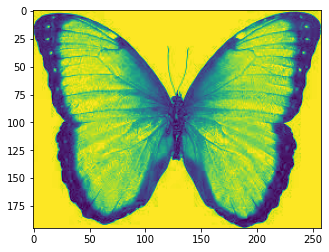

In [4]:
plt.imshow(image[:,:,[2]])

In [5]:
red= image.copy()

In [6]:
red.shape

(195, 258, 3)

In [7]:
red[:,:,[1,2]]=0

In [8]:
print(red)

[[[251   0   0]
  [244   0   0]
  [252   0   0]
  ...
  [253   0   0]
  [253   0   0]
  [253   0   0]]

 [[244   0   0]
  [254   0   0]
  [254   0   0]
  ...
  [254   0   0]
  [254   0   0]
  [254   0   0]]

 [[243   0   0]
  [245   0   0]
  [240   0   0]
  ...
  [243   0   0]
  [254   0   0]
  [254   0   0]]

 ...

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]


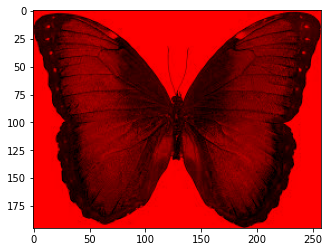

In [9]:
plt.imshow(red)

In [10]:
def rgb2gray(rgb):
    r,g,b=rgb[:,:,0],rgb[:,:,1],rgb[:,:,2]
    #gray=(r+g+b)/3
    gray= 0.2989*r+0.5870*g+0.1140*b    #standard value
    return gray

In [11]:
gray=rgb2gray(image)
print(gray)

[[253.7789 246.8936 252.9038 ... 254.2627 254.2627 254.2627]
 [246.8936 254.6756 254.6756 ... 254.6756 253.9746 253.9746]
 [243.9047 245.9045 240.905  ... 242.9757 253.9746 253.9746]
 ...
 [254.9745 254.9745 254.9745 ... 254.9745 254.9745 254.9745]
 [254.9745 254.9745 254.9745 ... 254.9745 254.9745 254.9745]
 [254.9745 254.9745 254.9745 ... 254.9745 254.9745 254.9745]]


In [12]:
gray

array([[253.7789, 246.8936, 252.9038, ..., 254.2627, 254.2627, 254.2627],
       [246.8936, 254.6756, 254.6756, ..., 254.6756, 253.9746, 253.9746],
       [243.9047, 245.9045, 240.905 , ..., 242.9757, 253.9746, 253.9746],
       ...,
       [254.9745, 254.9745, 254.9745, ..., 254.9745, 254.9745, 254.9745],
       [254.9745, 254.9745, 254.9745, ..., 254.9745, 254.9745, 254.9745],
       [254.9745, 254.9745, 254.9745, ..., 254.9745, 254.9745, 254.9745]])

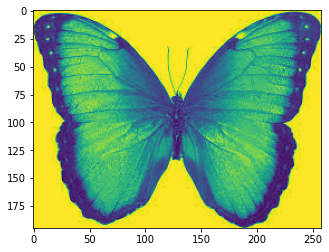

In [13]:
plt.imshow(gray)

In [14]:
gray.min(),gray.max()

(0.228, 254.97449999999998)

In [15]:
x=image[:,:,0]

(array([[  0.,   0.,   0., ...,   0.,   0., 195.],
        [  1.,   2.,   4., ...,   1.,   1., 184.],
        [  2.,  10.,   2., ...,   0.,   0., 178.],
        ...,
        [  2.,   3.,  12., ...,   0.,   0., 176.],
        [  4.,   6.,   2., ...,   1.,   1., 178.],
        [  0.,   0.,   0., ...,   2.,   0., 185.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 258 BarContainer objects>)

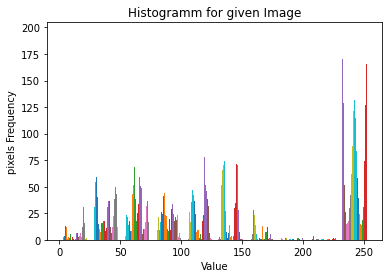

In [16]:
plt.title("Histogramm for given Image")
plt.xlabel("Value")
plt.ylabel("pixels Frequency")
plt.hist(x)

Text(0.5, 1.0, 'Histogram of the original image')

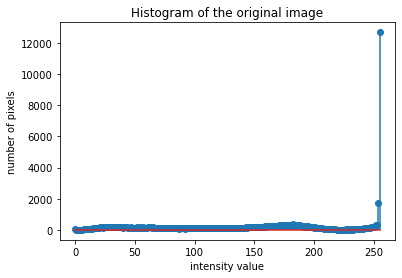

In [18]:
import cv2
def hist_plot(img):
    count =[]             #intensity count
    r = []                #intensity value

    for k in range(0, 256):              #traverse each intensity value
        r.append(k)
        count1 = 0
        for i in range(m):             #traverse each pixel in the image 
            for j in range(n):
                if img[i, j]== k:
                    count1+= 1
        count.append(count1)
          
    return (r, count)
image= cv2.imread('test.JPG',0)
m, n = image.shape                  #total numbers of rows and columns of the image, size of the image
r1, count1 = hist_plot(image)
  
plt.stem(r1, count1)               # plotting the histogram
plt.xlabel('intensity value')
plt.ylabel('number of pixels')
plt.title('Histogram of the original image')

Text(0.5, 1.0, 'Histogram of the stretched image')

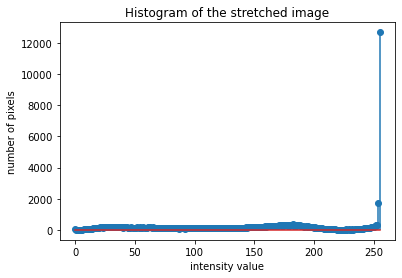

In [19]:
constant = (255-0)/(image.max()-image.min())             #transformation for stretching
img_stretch = image * constant
r, count = hist_plot(img_stretch)


# plotting the histogram
plt.stem(r, count)
plt.xlabel('intensity value')
plt.ylabel('number of pixels')
plt.title('Histogram of the stretched image')


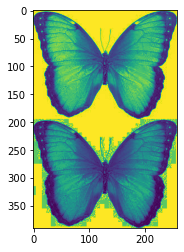

In [21]:
# Histogram Stretching using builtin function

import cv2
import numpy as np
import matplotlib.pyplot as plt

Image='test.JPG'
img = cv2.imread(Image,0)
equ = cv2.equalizeHist(img)
res = np.vstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)
plt.imshow(res)